1) importing yahoo finance api.

In [87]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import yfinance as yf

2) taking 5 year values with interval of 1 day of apple stocks.

In [90]:
stock_symbol = 'AAPL'

In [91]:
data = yf.download(tickers=stock_symbol, period= '5y', interval = '1d')

[*********************100%%**********************]  1 of 1 completed


In [92]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-11-19,47.500000,47.674999,46.247501,46.465000,44.597614,167701200
2018-11-20,44.592499,45.367500,43.877499,44.244999,42.466831,271300800
2018-11-21,44.932499,45.067501,44.137501,44.195000,42.418842,124496800
2018-11-23,43.735001,44.150002,43.025002,43.072498,41.341454,94496000
2018-11-26,43.560001,43.737499,42.564999,43.654999,41.900539,179994000
...,...,...,...,...,...,...
2023-11-13,185.820007,186.029999,184.210007,184.800003,184.800003,43627500
2023-11-14,187.699997,188.110001,186.300003,187.440002,187.440002,60108400
2023-11-15,187.850006,189.500000,187.779999,188.009995,188.009995,53790500


In [93]:
len(data)

1258

3) Taking adjusted close values of stock and plotting it.

In [94]:
stock=data[['Adj Close']]

<Axes: xlabel='Date'>

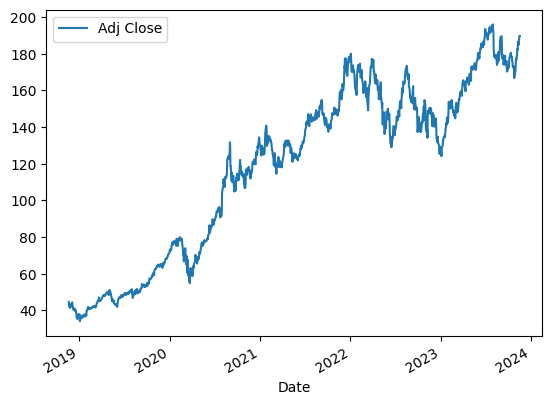

In [95]:
stock.plot()

4) Converting the dataframe into array of values and plotting it.

In [96]:
ds = stock.values

In [97]:
ds

array([[ 44.59761429],
       [ 42.46683121],
       [ 42.41884232],
       ...,
       [188.00999451],
       [189.71000671],
       [189.69000244]])

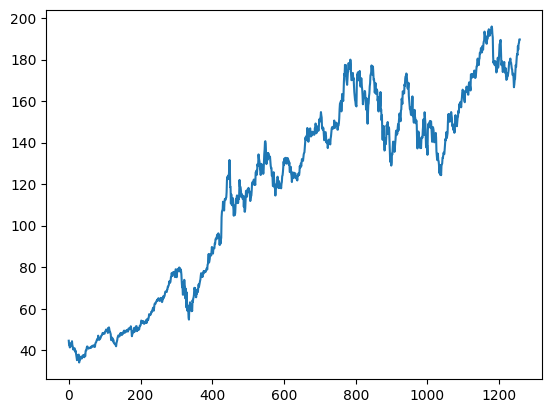

In [98]:
plt.plot(ds)

5) Using MinMaxScaler feature of Sklearn library to normalize data to a range between 0 and 1.

In [99]:
from sklearn.preprocessing import MinMaxScaler

In [100]:
normalizer = MinMaxScaler(feature_range= (0,1))


In [101]:
numpy_arr = np.array(ds).reshape(-1,1)

In [102]:
numpy_arr

array([[ 44.59761429],
       [ 42.46683121],
       [ 42.41884232],
       ...,
       [188.00999451],
       [189.71000671],
       [189.69000244]])

In [103]:
ds_scaled=normalizer.fit_transform(numpy_arr)

In [104]:
ds_scaled

array([[0.06476033],
       [0.05159174],
       [0.05129517],
       ...,
       [0.9510719 ],
       [0.96157825],
       [0.96145462]])

6) train test split (70-30 ratio)

In [105]:
train_size=int(len(ds_scaled)*0.70)
test_size=len(ds_scaled)-train_size

In [106]:
train_size,test_size

(880, 378)

In [107]:
ds_train,ds_test= ds_scaled[0:train_size,:],ds_scaled[train_size:len(ds_scaled),:1]

In [108]:
len(ds_train),len(ds_test)

(880, 378)

7) creating dataset in time series

In [109]:
def create_ds(dataset,step):
  X_train,Y_train=[],[]
  for i in range(len(dataset)-step-1):
   a=  dataset[i:(i+step),0]
   X_train.append(a)
   Y_train.append(dataset[i+step,0])
  return np.array(X_train),np.array(Y_train)


taking step size as 100 and creating train and test datasets for time series

In [110]:
time_stamp= 100
X_train, y_train= create_ds(ds_train, time_stamp)
X_test, y_test= create_ds(ds_test, time_stamp)

In [111]:
X_train.shape, y_train.shape


((779, 100), (779,))

In [112]:
X_test.shape, y_test.shape


((277, 100), (277,))

8) reshaping the data to fit into LSTM model.

In [113]:
X_train= X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test= X_test.reshape(X_test.shape[0],X_test.shape[1],1)


9) creating LSTM model.

In [114]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [115]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [116]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 50)           20200     
                                                                 
 dropout_5 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 50)           20200     
                                                                 
 dropout_6 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_7 (LSTM)               (None, 50)               

10) training model with Adam optimizer and MSE loss function

In [117]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [118]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50,batch_size=64)

Epoch 1/50
13/13 [==============================] - 15s 406ms/step - loss: 0.0762 - val_loss: 0.0945
Epoch 2/50
13/13 [==============================] - 4s 307ms/step - loss: 0.0179 - val_loss: 0.0074
Epoch 3/50
13/13 [==============================] - 5s 362ms/step - loss: 0.0068 - val_loss: 0.0027
Epoch 4/50
13/13 [==============================] - 4s 282ms/step - loss: 0.0057 - val_loss: 0.0025
Epoch 5/50
13/13 [==============================] - 4s 285ms/step - loss: 0.0051 - val_loss: 0.0029
Epoch 6/50
13/13 [==============================] - 5s 412ms/step - loss: 0.0045 - val_loss: 0.0025
Epoch 7/50
13/13 [==============================] - 3s 256ms/step - loss: 0.0042 - val_loss: 0.0027
Epoch 8/50
13/13 [==============================] - 3s 259ms/step - loss: 0.0042 - val_loss: 0.0027
Epoch 9/50
13/13 [==============================] - 4s 283ms/step - loss: 0.0047 - val_loss: 0.0063
Epoch 10/50
13/13 [==============================] - 5s 372ms/step - loss: 0.0047 - val_loss: 0.007

11) predicting on test and train data

In [119]:
train_predict= model.predict(X_train)
test_predict= model.predict(X_test)

9/9 [==============================] - 0s 43ms/step


12) inverse transform to get actual value

In [120]:
train_predict= normalizer.inverse_transform(train_predict)
test_predict= normalizer.inverse_transform(test_predict)

13) combning predicted test and train values and comparing stock graph.



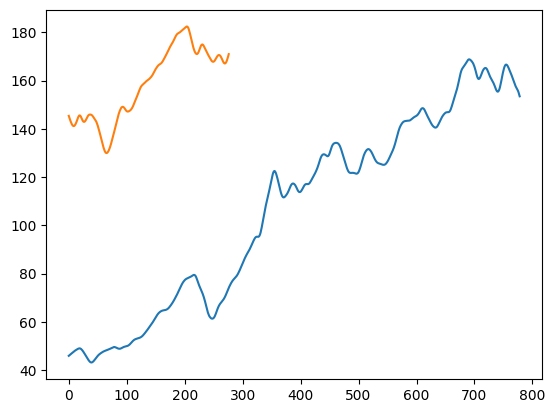

In [121]:
plt.plot(train_predict)
plt.plot(test_predict)

In [122]:
test=np.vstack((train_predict,test_predict))

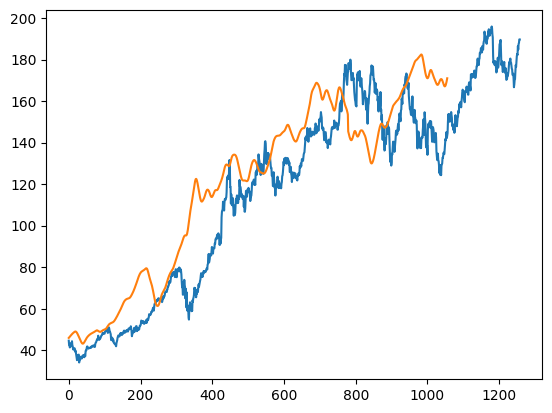

In [123]:
plt.plot(normalizer.inverse_transform(ds_scaled))
plt.plot(test)

In [124]:
len(ds_test)

378

getting last 100 days record.

In [125]:
future_input= ds_test[len(ds_test)-100:]

In [126]:
future_input=future_input.reshape(1,-1)

In [127]:
future_input

array([[0.95771688, 0.98471406, 0.97540685, 0.96844182, 0.97140035,
        0.96443531, 0.95167657, 0.94840986, 0.95882643, 0.96357236,
        0.96449699, 0.98483731, 0.98323465, 0.991679  , 0.97953652,
        0.97220172, 0.97719425, 0.98255672, 0.98798077, 0.9800912 ,
        0.99617852, 1.        , 0.99482246, 0.97614637, 0.96745561,
        0.91087285, 0.89151873, 0.89737421, 0.88745065, 0.88609468,
        0.88646501, 0.89677238, 0.88436651, 0.8789352 , 0.86307307,
        0.86609733, 0.87442955, 0.88300866, 0.90701789, 0.87776246,
        0.89152609, 0.90127793, 0.92553395, 0.94732124, 0.94867909,
        0.9584927 , 0.9599739 , 0.91806581, 0.88504548, 0.88887206,
        0.89615508, 0.8772687 , 0.86436916, 0.87381244, 0.8693067 ,
        0.88757598, 0.89436523, 0.87226938, 0.86264098, 0.86794885,
        0.87591085, 0.85048209, 0.84103881, 0.84264363, 0.8458531 ,
        0.86153001, 0.85319779, 0.86097458, 0.86868959, 0.88461348,
        0.89387147, 0.89016824, 0.89887078, 0.90

creating list of last 100 values.

In [128]:
tmp_input= list(future_input)


In [129]:
tmp_input= tmp_input[0].tolist()

In [130]:
tmp_input

[0.9577168777466423,
 0.9847140601747615,
 0.9754068526126269,
 0.9684418181296521,
 0.9714003475821815,
 0.9644353130992067,
 0.9516765664272635,
 0.9484098587880492,
 0.9588264323808326,
 0.9635723575954265,
 0.9644969864572519,
 0.9848373125890812,
 0.9832346539958405,
 0.9916790003559657,
 0.9795365157556215,
 0.9722017240296872,
 0.9771942483746912,
 0.9825567185661963,
 0.9879807678139758,
 0.9800911987709462,
 0.9961785150436904,
 1.0,
 0.99482245558086,
 0.976146367098546,
 0.9674556102115521,
 0.9108728503528265,
 0.8915187321390972,
 0.8973742119878816,
 0.8874506480523772,
 0.8860946828913177,
 0.8864650059449015,
 0.8967723780872012,
 0.8843665086412602,
 0.8789351981571358,
 0.8630730745128505,
 0.8660973322995658,
 0.874429553854315,
 0.8830086574447864,
 0.9070178882679143,
 0.8777624613365687,
 0.8915260876772126,
 0.9012779280882515,
 0.9255339466453312,
 0.9473212391469565,
 0.9486790903434303,
 0.958492698414285,
 0.9599738963268494,
 0.9180658122156109,
 0.885045481

In [132]:
#Predicting next 5 days price suing the current data
#It will predict in sliding window manner (algorithm) with stride 1
lst_output=[]
n_steps=100
i=0
while(i<5):

    if(len(tmp_input)>100):
        future_input = np.array(tmp_input[1:])
        future_input=future_input.reshape(1,-1)
        future_input = future_input.reshape((1, n_steps, 1))
        yhat = model.predict(future_input, verbose=0)
        tmp_input.extend(yhat[0].tolist())
        tmp_input = tmp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        future_input = future_input.reshape((1, n_steps,1))
        yhat = model.predict(future_input, verbose=0)
        tmp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)



[[0.7900704741477966], [0.7878509163856506], [0.7856777906417847], [0.7835485339164734], [0.7814620137214661]]


In [141]:
len(ds_scaled)

1258

In [133]:
lst_output_values= normalizer.inverse_transform(lst_output).tolist()
lst_output_values

[[161.95866132074775],
 [161.59951892661115],
 [161.24788960849992],
 [160.90335865233305],
 [160.56574281235385]]

In [148]:
#Creating a dummy plane to plot graph one after another
plot_new=np.arange(1,101)
plot_pred=np.arange(101,106)

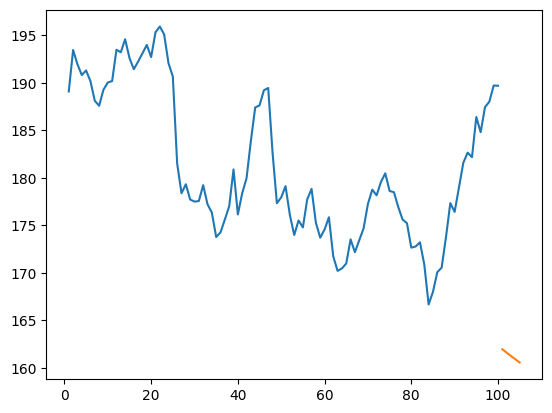

In [149]:
plt.plot(plot_new, normalizer.inverse_transform(ds_scaled[1158:]))
plt.plot(plot_pred, normalizer.inverse_transform(lst_output))

In [150]:
ds_new = ds_scaled.tolist()


In [151]:
len(ds_new)


1258

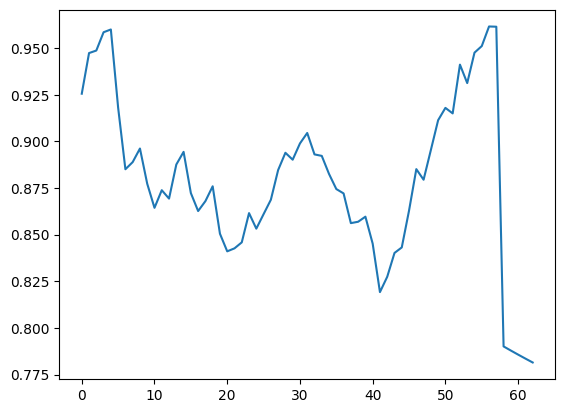

In [152]:
#Extend helps us to fill the missing value with approx value
ds_new.extend(lst_output)
plt.plot(ds_new[1200:])

In [154]:
#Creating final data for plotting
final_graph = normalizer.inverse_transform(ds_new).tolist()


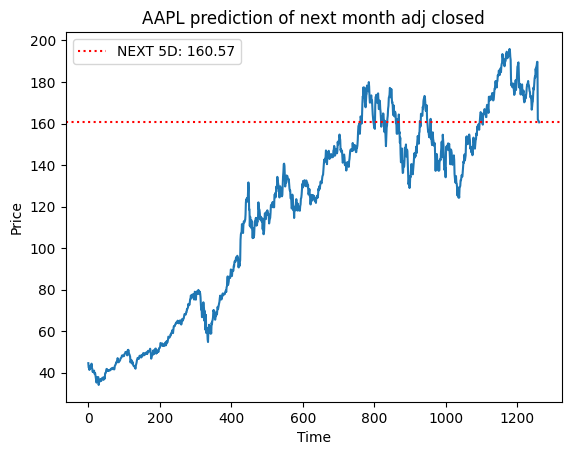

In [155]:
#Plotting final results with predicted value after 5 Days
plt.plot(final_graph)
plt.ylabel("Price")
plt.xlabel("Time")
plt.title("{0} prediction of next month adj closed".format(stock_symbol))
plt.axhline(y=final_graph[len(final_graph)-1], color = 'red', linestyle = ':', label = 'NEXT 5D: {0}'.format(round(float(*final_graph[len(final_graph)-1]),2)))
plt.legend()

In [156]:
# Print the predicted values for the next 5 days
for i in range(5):
    predicted_value = normalizer.inverse_transform([lst_output[i]])
    print("Predicted value for day {}: {}".format(i + 1, predicted_value[0][0]))


Predicted value for day 1: 161.95866132074775
Predicted value for day 2: 161.59951892661115
Predicted value for day 3: 161.24788960849992
Predicted value for day 4: 160.90335865233305
Predicted value for day 5: 160.56574281235385


In [157]:
# Extract date values as a list
date_list = data.index.strftime('%Y-%m-%d').tolist()

# Extract 'Adj Close' column values as a list
adj_close_list = data['Adj Close'].tolist()

# Print the first few values of the lists
print("Date list:")
print(date_list[-5:])

print("\nAdj Close list:")
print(adj_close_list[-5:])


Date list:
['2023-11-13', '2023-11-14', '2023-11-15', '2023-11-16', '2023-11-17']

Adj Close list:
[184.8000030517578, 187.44000244140625, 188.00999450683594, 189.7100067138672, 189.69000244140625]


In [158]:
# Assuming 'final_graph' contains the predicted scaled values for the next 5 days
predicted_dates = pd.date_range(start=data.index[-1], periods=6)[1:].strftime('%Y-%m-%d').tolist()

# Extract only the predicted scaled values from lst_output
predicted_scaled_values = [val[0] for val in lst_output[-5:]]

# Inverse transform the scaled values to get them in the original scale
predicted_values = normalizer.inverse_transform(np.array(predicted_scaled_values).reshape(-1, 1)).flatten().tolist()

# Extend date_list and adj_close_list with the predicted values
date_list.extend(predicted_dates)
adj_close_list.extend(predicted_values)

# Print the updated lists
print("Updated Date list:")
print(date_list[-10:])  # Print the last 10 values to check if the predicted values are added

print("\nUpdated Adj Close list:")
print(adj_close_list[-10:])  # Print the last 10 values to check if the predicted values are added


Updated Date list:
['2023-11-13', '2023-11-14', '2023-11-15', '2023-11-16', '2023-11-17', '2023-11-18', '2023-11-19', '2023-11-20', '2023-11-21', '2023-11-22']

Updated Adj Close list:
[184.8000030517578, 187.44000244140625, 188.00999450683594, 189.7100067138672, 189.69000244140625, 161.95866132074775, 161.59951892661115, 161.24788960849992, 160.90335865233305, 160.56574281235385]


In [159]:
import json


In [160]:
# Create a dictionary from the lists
data_dict = {'date': date_list, 'adj_close': adj_close_list}

# Convert the dictionary to JSON format
json_data = json.dumps(data_dict, indent=2)

# Print or save the JSON data
print(json_data)

{
  "date": [
    "2018-11-19",
    "2018-11-20",
    "2018-11-21",
    "2018-11-23",
    "2018-11-26",
    "2018-11-27",
    "2018-11-28",
    "2018-11-29",
    "2018-11-30",
    "2018-12-03",
    "2018-12-04",
    "2018-12-06",
    "2018-12-07",
    "2018-12-10",
    "2018-12-11",
    "2018-12-12",
    "2018-12-13",
    "2018-12-14",
    "2018-12-17",
    "2018-12-18",
    "2018-12-19",
    "2018-12-20",
    "2018-12-21",
    "2018-12-24",
    "2018-12-26",
    "2018-12-27",
    "2018-12-28",
    "2018-12-31",
    "2019-01-02",
    "2019-01-03",
    "2019-01-04",
    "2019-01-07",
    "2019-01-08",
    "2019-01-09",
    "2019-01-10",
    "2019-01-11",
    "2019-01-14",
    "2019-01-15",
    "2019-01-16",
    "2019-01-17",
    "2019-01-18",
    "2019-01-22",
    "2019-01-23",
    "2019-01-24",
    "2019-01-25",
    "2019-01-28",
    "2019-01-29",
    "2019-01-30",
    "2019-01-31",
    "2019-02-01",
    "2019-02-04",
    "2019-02-05",
    "2019-02-06",
    "2019-02-07",
    "2019-02-0

In [161]:
with open('output.json', 'w') as json_file:
    json.dump(data_dict, json_file, indent=2)
